In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/car distraction/imgs.zip" -d "/content/drive/MyDrive/car distraction/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_566.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56636.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56661.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56699.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56717.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56724.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56768.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56779.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56849.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56899.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_56938.jpg  
  inflating: /content/drive/MyDrive/car distraction/train/c7/img_5706.jpg  
  inflating: /content/drive/

According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. 
Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year.

In Order to reduce it this ,i have developed a machine learning model that as been traied with multiple classes of actions performed by a driver.if the driver is found to do any other action other that safe driving an alert will be triggered.

In [ ]:
#Required libraries are Exported
import numpy as np 
import pandas as pd 
import cv2 
import glob
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
import tensorflow
import random
from PIL import Image
import h5py
import os

In [ ]:
#Path for the data are being specifed
train_path  = '/content/drive/MyDrive/car distraction/train'
test_path = '/content/drive/MyDrive/car distraction/test'

In [ ]:
#Defining the various classes
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']


In [ ]:
training_data = []
testing_data = []


In [ ]:
#Appending images with its apporiate labels to the training Data
#Converting the images into grayscale and re Sizing the image to a size that the convolution later could process.
def create_training_data():
    for category in classes:
        path = os.path.join(train_path,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(240,240))
            training_data.append([new_img,class_num])

In [ ]:
training_data[0]

[array([[ 32,  36,  35, ..., 160, 162, 234],
        [ 38,  40,  37, ..., 178, 232, 240],
        [ 36,  38,  32, ..., 228, 226, 202],
        ...,
        [ 49,  53,  52, ...,  17,  12,  12],
        [ 47,  50,  54, ...,  18,  10,  11],
        [ 94,  68,  55, ...,  18,   8,  10]], dtype=uint8), 0]

In [ ]:
create_training_data()

In [ ]:
#Appending images to the testing data
#Converting the images into grayscale and re Sizing the image to a size that the convolution later could process.
def create_testing_data():        
    for img in os.listdir(test_path):
        img_array = cv2.imread(os.path.join(test_path,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(240,240))
        testing_data.append([img,new_img])

In [ ]:
testing_data[1][1]

array([[ 45,  46,  43, ..., 190, 229, 195],
       [ 26,  27,  76, ..., 191, 228, 186],
       [176, 216, 192, ..., 198, 221, 201],
       ...,
       [ 62,  63,  62, ...,  17,  16,  16],
       [ 62,  63,  62, ...,  16,  16,  17],
       [ 62,  63,  62, ...,  15,  16,  17]], dtype=uint8)

In [ ]:
create_testing_data()

In [ ]:
#Separating training data into features and labels
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [ ]:
y = np.array(y)

In [ ]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
i = pd.Index(y)

In [ ]:
i.value_counts()

0    2489
3    2346
4    2326
6    2325
2    2317
5    2312
1    2267
9    2129
7    2002
8    1911
dtype: int64

In [ ]:
#Encoding the train labels for processing
Y = pd.get_dummies(y)

In [ ]:
Y

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22419,0,0,0,0,0,0,0,0,0,1
22420,0,0,0,0,0,0,0,0,0,1
22421,0,0,0,0,0,0,0,0,0,1
22422,0,0,0,0,0,0,0,0,0,1


In [ ]:
#
X = np.array(x).reshape(-1,240,240,1)
X[0].shape

(240, 240, 1)

In [ ]:
X.shape


(22424, 240, 240, 1)

In [ ]:
#Splitting features and labels into test and train dataset
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
X_train.shape

(17939, 240, 240, 1)

In [ ]:
y_train.shape

(17939, 10)

In [ ]:
#importing the libraries for creting the neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
#Building the layers for learning
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 32)      9

In [ ]:
#Defining the optimizer and loss Function,Since it is a multi class classification we are using categorical cross entropy
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#Training the model
results = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
561/561 [==============================] - 76s 135ms/step - loss: 1.0296 - accuracy: 0.6862 - val_loss: 0.1096 - val_accuracy: 0.9701
Epoch 2/10
561/561 [==============================] - 77s 138ms/step - loss: 0.1420 - accuracy: 0.9555 - val_loss: 0.1690 - val_accuracy: 0.9777
Epoch 3/10
561/561 [==============================] - 77s 138ms/step - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.0604 - val_accuracy: 0.9848
Epoch 4/10
561/561 [==============================] - 77s 138ms/step - loss: 0.0739 - accuracy: 0.9759 - val_loss: 0.0349 - val_accuracy: 0.9915
Epoch 5/10
561/561 [==============================] - 77s 137ms/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 0.0630 - val_accuracy: 0.9868
Epoch 6/10
561/561 [==============================] - 77s 137ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0603 - val_accuracy: 0.9889
Epoch 7/10
561/561 [==============================] - 77s 137ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0388 - val_ac

In [ ]:
val_img = np.array(testing_data[18][1]).reshape(-1,240,240,1)
pred = model.predict_classes(val_img)

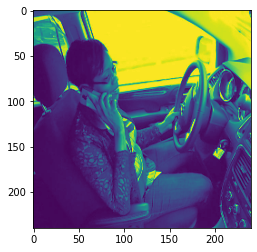

In [ ]:
plt.imshow(testing_data[18][1])
plt.show()

In [ ]:
pred

array([2])

In [ ]:
model_json = model.to_json()
with open("/content/sample_data/model_data/Model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("/content/sample_data/model_data/Model_Weights.h5")